**Exercise 11.1b**

Let g = 9.8, k = 0.2 and v0 = 35.0 (in SI units) in Eq.(11.2). Write a Python program that uses the algorithm described above to solve y(t) = 0. Start with an initial guess close to 0 and use a time step size of 0.00001. Use your result to determine how fast the ball is moving when it reaches the ground.

In [17]:
import sympy as sp

g = 9.8
k = 0.2 
v0 = 35.0

t = sp.symbols('t')
y = (v0 / k + g / k**2) * (1 - sp.exp(-k * t)) - (g / k) * t

t_guess = 5.9 #guess close to 0, I originally guessed 2, but I changed it to 5.9 for speed 
step = 0.00001

y_t = y.subs(t, t_guess)
while (y_t > 0):
    t_guess += step
    y_t = y.subs(t, t_guess)

print("Time when ball hits the ground:", t_guess)

v = sp.diff(y, t)
v_t = v.subs(t, t_guess)
print("Velocity when ball hits the ground:", v_t)

Time when ball hits the ground: 5.9787899999970175
Velocity when ball hits the ground: -23.5921343119435


**Exercise 11.3a**

Use bisection to solve the equation

    exp ( x ** 2 ) - x = 0,

with a tolerance of epsilon = 0.0001.

In [44]:
import sympy as sp 

eps = 0.0001

x = sp.symbols('x')
y = sp.exp(-x ** 2) - x

xL = 0.5
xR = 0.7

f_xL = y.subs(x, xL)
f_xR = y.subs(x, xR)

while xR - xL > (2 * eps): 
    xM = (xL + xR) / 2
    f_xM = y.subs(x, xM)

    if f_xM * f_xL > 0:
        xL = xM
        f_xL = y.subs(x, xL)
    elif f_xM * f_xR > 0:
        xR = xM
        f_xR = y.subs(x, xR)
    else:
        break

root = (xL + xR) / 2
print(root)

0.65283203125


**Exercise 11.4a**

Use Newton’s method to find the root of f(x) = x * ln(1 + x^2) + cos(x) with a tolerance of epsilon = 10 ^ -5. 

In [34]:
import sympy as sp

eps = 10 ** -5

x = sp.symbols('x')
f = x * sp.ln(1 + x**2) + sp.cos(x)
f_prime = sp.diff(f, x)

x_old = 0.1  #initial guess 

while (f.subs(x, x_old + eps) * f.subs(x, x_old - eps) > 0):
    x_new = x_old - f.subs(x, x_old) / f_prime.subs(x, x_old)
    x_old = x_new

print(x_old)

-0.937728236851743


**Exercise 11.6b**

Graph the cubic polynomial f(x) = x^3 + 4x^2 + 2. Use bisection to find all three roots to within a tolerance of eps = 0.0001. What happens if there are two roots between the initial xL and xR? Three roots?

- When there are multiple roots between xL and xR, the smallest root is returned. 

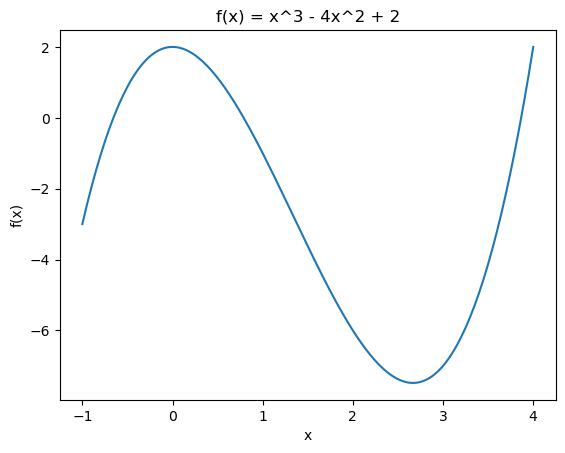

In [41]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-1, 4, 200)
f = x**3 - 4*x**2 + 2

plt.close()
plt.plot(x, f) 
plt.title("f(x) = x^3 - 4x^2 + 2")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

In [47]:
import sympy as sp 

eps = 0.0001

x = sp.symbols('x')
f = x**3 - 4*x**2 + 2

xL = -5
xR = 5

f_xL = f.subs(x, xL)
f_xR = f.subs(x, xR)

while xR - xL > (2 * eps): 
    xM = (xL + xR) / 2
    f_xM = f.subs(x, xM)

    if f_xM * f_xL > 0:
        xL = xM
        f_xL = f.subs(x, xL)
    elif f_xM * f_xR > 0:
        xR = xM
        f_xR = f.subs(x, xR)
    else:
        break

root = (xL + xR) / 2
print(root)

-0.6554412841796875


**Exercise 11.7a**

Consider the function 

    f(x) = (1/5)x^(3/2) + (1/9)x + 4cos(x) - 3, x >= 0

Write a code that will plot the graph of f(x) and use the scipy.optimize function root() to find the roots. Experiment with different values for the tolerance. 

- root 1 = 0.8075
- root 2 = 4.8028
- root 3 = 8.7672
- root 4 = 9.5533

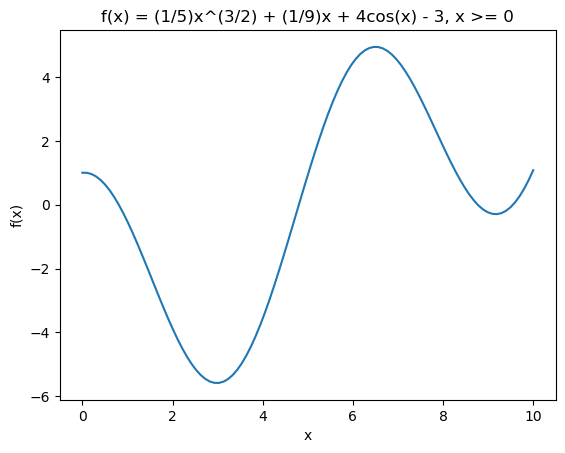

root 1 = 0.8075
root 2 = 4.8028
root 3 = 8.7672
root 4 = 9.5533


In [58]:
import scipy.optimize as so
import numpy as np

def fxn(x):
    return (1/5) * x ** (3/2) + (1/9) * x + 4 * np.cos(x) - 3

# Graphing
x = np.linspace(0, 10, 100)
f = fxn(x)

plt.close()
plt.plot(x, f) 
plt.title("f(x) = (1/5)x^(3/2) + (1/9)x + 4cos(x) - 3, x >= 0")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

# Root Finding, first root
rootinfo = so.root(fxn, 1, tol=0.0001)
print(f"root 1 = {rootinfo.x[0]:.4f}")

# Second root
rootinfo = so.root(fxn, 5, tol=0.0001)
print(f"root 2 = {rootinfo.x[0]:.4f}")

# Third root
rootinfo = so.root(fxn, 8.5, tol=0.0001)
print(f"root 3 = {rootinfo.x[0]:.4f}")

# Fourth root
rootinfo = so.root(fxn, 9.5, tol=0.0001)
print(f"root 4 = {rootinfo.x[0]:.4f}")

**Exercise 11.7b**

The system 

    x^3 - y + 1 = 0
    x^2 + xy - y = 0

has two real solutions. Use root() to find them. 

In [59]:
import scipy.optimize as so

def fxns(variables):
    x, y = variables
    eq1 = x**3 - y + 1
    eq2 = x**2 - x*y - y
    return [eq1, eq2]

rootinfo = so.root(fxns, [1,2], tol=0.001)
print(rootinfo.x)

[-0.58070701  0.80419865]
